

## **COMP6685 Deep Learning Coursework A1**


Individual (25% of total mark)


**TASK:**	You are required to develop a phyton code with appropriate comments and answer questions.

**Description**: Create a code using this temlate to train a Convolutional Neural Network (CNN) on the fashion MNIST dataset available at https://keras.io/api/datasets/fashion_mnist/ . 

Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The dataset should be imported in the code and one sample image should be visualised before applying the model.

Define a CNN and comment the chosen parameters of the network. Apply a regularization method (L1, L2 or L1L2). Divide the dataset into training, validation and test set. Obtain the accuracy on the validation set and plot the final results using the data from the test set. Comment your lines of code appropriately to explain your solution.

Enhance the model's performance to obtain the best or optimal validation accuracy. Further questions about final remarks on the results will be answered on the markdown defined in the template.

---
---

Note: This is only a template. You can add more code/text cells if necessary.

In [18]:
# import of numpy and keras libraries
from __future__ import print_function
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt

# variables for network and training
N_EPOCH = 200 # initially set at 200 ; you can change this later 
BATCH_SIZE = 128  
VERBOSE = 1
N_CLASSES = 10   # number of classes/categories of digits from 0 to 9, i.e. number of output units 
OPTIMIZER = SGD(learning_rate=0.1) # Stochastic gradient descent optimiser
N_HIDDEN = 128   # number of hidden units
VALIDATION_SPLIT=0.2 # proportion of the dataset used for validation, with remaining .8 for training 

#each 2D image consists of 28x28 values/pixels, which needs to be reshaped in a vector of 784 pixels
RESHAPED = 784

# random seed number to be used for reproducibility
np.random.seed(1671) 

Import the dataset and divide it into training, validation and test sets. Explain how you obtained the validation set. How did you choose the size of the validation set? **(10 marks)**

---

In [19]:
# Loading the Fashion MNIST dataset from TensorFlow's keras library
(input_X_train, output_Y_train), (input_X_test, output_Y_test) = keras.datasets.fashion_mnist.load_data()

# print the shapes of the input and output data
print("Training data input shape: " , input_X_train.shape)
print("Training data output shape: " , output_Y_train.shape)
print("Test data input shape: " , input_X_test.shape)
print("Test data ouput shape: " , output_Y_test.shape)

Training data input shape:  (60000, 28, 28)
Training data output shape:  (60000,)
Test data input shape:  (10000, 28, 28)
Test data ouput shape:  (10000,)


*your answer here*

Visualise a random sample image of the dataset. **(10 marks)**

---



Sample input image: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00784314 0.         0.02352941
 0.38039216 0.30588236 0.3529412  0.3254902  0.5647059  0.
 0.         0.00784314 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01568628
 0.         0.         0.         0.33333334 0.8901961  0.80784315
 0.8862745  0.89411765 0.9098039  0.05490196 0.         0.
 0.00392157 0.01960784 0.00392157 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.02745098
 0.3019608  0.7294118  0.8235294  0.7647059  0.7882353  0.69411767
 0.8039216  0.7137255  0.34117648 0.         0.         0.
 0.00392157 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.19215687 0.6392157  0.8509804  0.9019608 

TypeError: Invalid shape (784,) for image data

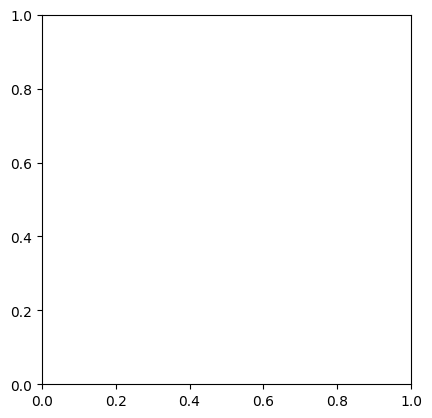

In [23]:
# visualisation of the numerical vector and plot of a selected image
random_index = np.random.randint(0, input_X_train.shape[0])
image = input_X_train[random_index]
print ("Sample input image: " + str(image))
plt.imshow(image, cmap='gray')
plt.show() 

In [21]:
# use 60000 images for training, 10000 for validation test
input_X_train = input_X_train.reshape(60000, RESHAPED)
input_X_test = input_X_test.reshape(10000, RESHAPED)
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')

# normalisation of the pixel values from 0-255 range to 0-1 range 
input_X_train /= 255
input_X_test /= 255

print ("Input data ready")

Input data ready


In [22]:
# convert class vectors to binary class matrices
output_Y_train = utils.to_categorical(output_Y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_Y_test, N_CLASSES)

# print the categorical, one-hot output vector for the sample image
label = output_Y_train[Selected_Image]
print ("One-hot-vector: " + str(label))

NameError: name 'Selected_Image' is not defined

Define your CNN model. Specify the network and training parameters and comment them. **(10 marks)**

---

In [ ]:
# example of L1,l2 regularizers

# import the regularizers
from tensorflow.keras import regularizers

N_EPOCH = 20 
N_HIDDEN = 128

model = Sequential()

# Hidden layer 1 with 128 hidden units and ReLu activation function
model.add(Dense(N_HIDDEN,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L1(1e-5), activity_regularizer=regularizers.L2(1e-4),input_shape=(RESHAPED,)))
model.add(Activation('relu'))
# Hidden layer 2 with 128 hidden units and ReLu activation function
model.add(Dense(N_HIDDEN,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),  bias_regularizer=regularizers.L1(1e-5),activity_regularizer=regularizers.L2(1e-4)))
model.add(Activation('relu'))

# output layer with 10 units and softmax activation
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

# Summary of the whole model
model.summary()

# model compilation
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trai

Train the CNN model. **(10 marks)**

---

In [ ]:
#train the network
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Epoch 1/20


ValueError: in user code:

    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (128, 10, 10) and (128, 10) are incompatible


Evaluate your model. What is the best/highest validation accuracy your network achieved? How did you obtain this accuracy? **(10 marks)**


In [ ]:
# your code here
#test the network
score = model.evaluate(input_X_test, output_Y_test, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print("Test accuracy:", score[1])

ValueError: in user code:

    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1758, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\benha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 10) and (None, 10) are incompatible


*your answer here*

Plot the final results on the test set and print the accuracy/loss on that set. **(10 marks)**

---

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


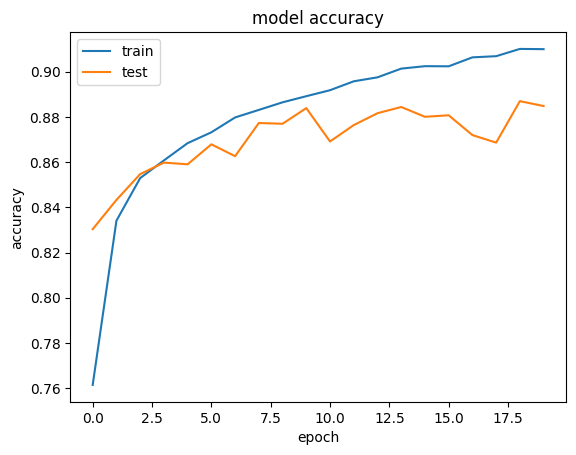

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


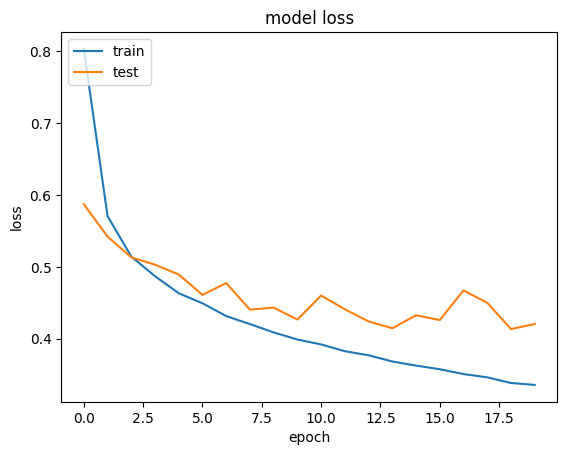

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Additional questions:


*   Describe whether you found any differences in the network’s accuracy when applying regularisation compared to not applying it. If there were differences, which regularisation did you use? If no differences were found, what could be the reason? **(10 marks)**

*your answer here*

*   Write your conclusions about the results achieved with your model on the fashion MNIST dataset and ideas to improve these results/performance further. **(10 marks)**

*your answer here*

---



Additional remarks:

*   Code outline appropriately commented. **(10 marks)**
*   Code running without errors. **(10 marks)**

---

